# 0. Información

## **Assignment Overview**

	•	Task: Recommend top 3 posts for each user based on profile interests, past engagement, and content attributes.

## **Dataset Information**

### **1. Users**
Tabla de usuarios

	•	User ID: ID del usuario.
	•	Age: Edad del usuario.
	•	Gender: Género del usuario.
	•	Top 3 Interests: Los 3 mayores intereses del usuario, parece que es el 'tags' de la tabla 'posts', separados por ','.
	•	Past Engagement Score: Score de su anterior interacción, no se especifica, parece que está en el rango de [0 - 1].

### **2. Posts**
Tabla del tipo de contenido

	•	Post ID: ID del post.
	•	Creator ID: ID del creador.
	•	Content Type: Tipo de contenido.
	•	Tags: Tema del contenido, separados por ','.

### **3. Engagements**
Tabla que junta la de 'Users' y 'Posts'

	•	User ID: ID del usuario.
	•	Post ID: ID del post.
	•	Engagement: Interacción del usuario con cierto post, parece que es un valor binario.

# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from collections import Counter
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# 2. Upload Data

Load CSV files

## A. Upload Users

In [2]:
users_df = pd.read_csv("Users.csv")

## B. Upload Posts

In [3]:
posts_df = pd.read_csv("Posts.csv")

## C. Upload Engagements

In [4]:
engagements_df = pd.read_csv("Engagements.csv")

# 3. Data Exploration

## A. Users Table

### A.1 General Information

In [5]:
users_df.head(5)

,user_id,age,gender,top_3_interests,past_engagement_score
0,U1,24,F,"sports, art, gaming",0.61
1,U2,32,F,"travel, food, fashion",0.93
2,U3,28,Other,"sports, travel, fashion",0.40
3,U4,25,M,"fashion, music, tech",0.53
4,U5,24,M,"fashion, food, fitness",0.80


In [6]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                50 non-null     object 
 1   age                    50 non-null     int64  
 2   gender                 50 non-null     object 
 3   top_3_interests        50 non-null     object 
 4   past_engagement_score  50 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB


In [7]:
users_df.describe()

,age,past_engagement_score
count,50.00000,50.000000
mean,25.60000,0.587800
std,4.66861,0.240682
min,18.00000,0.210000
25%,21.00000,0.392500
50%,25.00000,0.535000
75%,29.00000,0.847500
max,34.00000,0.980000


In [8]:
users_df.describe(include = "object")

,user_id,gender,top_3_interests
count,50,50,50
unique,50,3,47
top,U1,M,"fashion, food, fitness"
freq,1,25,2


### A.2 Inspect Column 'age'

There are no negative ages

In [9]:
users_df[users_df["age"] <= 0].shape[0]

0

There are no outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7bd9df1b20>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7bd9df2120>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7bd9df1310>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7bd9df2720>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7bd9df2a50>],
 'means': []}

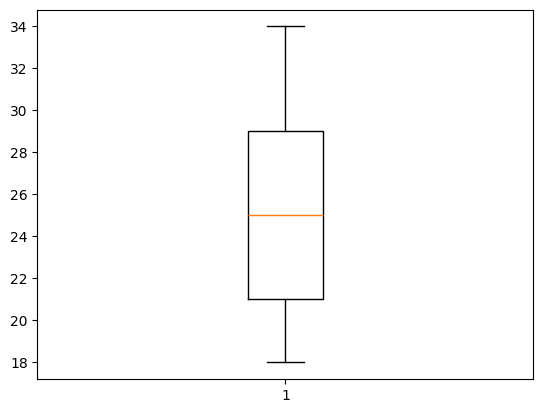

In [10]:
plt.boxplot(users_df["age"])

### A.3 Inspect Column 'gender'

All looks normal

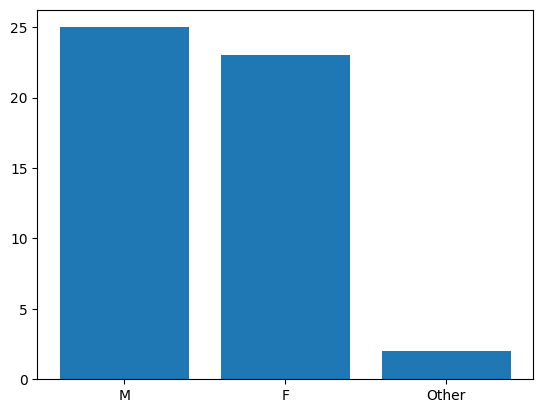

In [11]:
gender_counts = users_df["gender"].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.show()

### A.4 Inspect Column 'top_3_interests'

There are no missing value

In [12]:
users_df[users_df["top_3_interests"].isna()].shape[0]

0

There are duplicate values, possibly due to the space after the ','

In [13]:
Counter(",".join(users_df["top_3_interests"]).split(","))

Counter({'sports': 7,
         ' art': 10,
         ' gaming': 12,
         'travel': 3,
         ' food': 14,
         ' fashion': 11,
         ' travel': 15,
         'fashion': 8,
         ' music': 4,
         ' tech': 5,
         ' fitness': 12,
         'food': 8,
         ' sports': 9,
         'art': 2,
         ' literature': 8,
         'gaming': 4,
         'fitness': 3,
         'music': 7,
         'tech': 4,
         'literature': 4})

### A.5 Inspect Column 'past_engagement_score'

Al looks normal, no outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7bd9ec76e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7bd9ec4590>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7bd9ec7b30>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7bd9ec5dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7bd9e6be60>],
 'means': []}

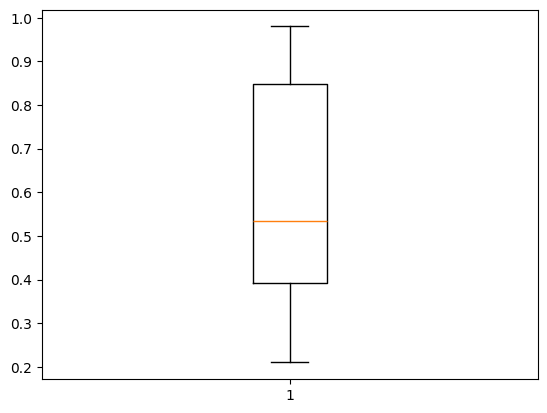

In [14]:
plt.boxplot(users_df["past_engagement_score"])

## B. Posts Table

### B.1 General Information

In [15]:
posts_df.head(5)

,post_id,creator_id,content_type,tags
0,P1,U44,video,"sports, food"
1,P2,U26,video,"music, travel"
2,P3,U32,text,"sports, travel"
3,P4,U6,image,"music, gaming"
4,P5,U32,image,"food, fashion"


In [16]:
posts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   post_id       100 non-null    object
 1   creator_id    100 non-null    object
 2   content_type  100 non-null    object
 3   tags          100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [17]:
posts_df.describe(include = "object")

,post_id,creator_id,content_type,tags
count,100,100,100,100
unique,100,43,4,50
top,P1,U48,image,tech
freq,1,6,37,6


### B.2 Inspect Column 'creator_id'

There are no missing values

In [18]:
posts_df[posts_df["creator_id"].isna()].shape[0]

0

In [19]:
posts_df["creator_id"].unique()

array(['U44', 'U26', 'U32', 'U6', 'U4', 'U11', 'U17', 'U38', 'U24', 'U5',
       'U34', 'U22', 'U48', 'U16', 'U33', 'U9', 'U29', 'U3', 'U20', 'U36',
       'U19', 'U7', 'U41', 'U40', 'U39', 'U18', 'U1', 'U28', 'U25', 'U50',
       'U23', 'U31', 'U30', 'U42', 'U35', 'U49', 'U2', 'U12', 'U37', 'U8',
       'U46', 'U14', 'U21'], dtype=object)

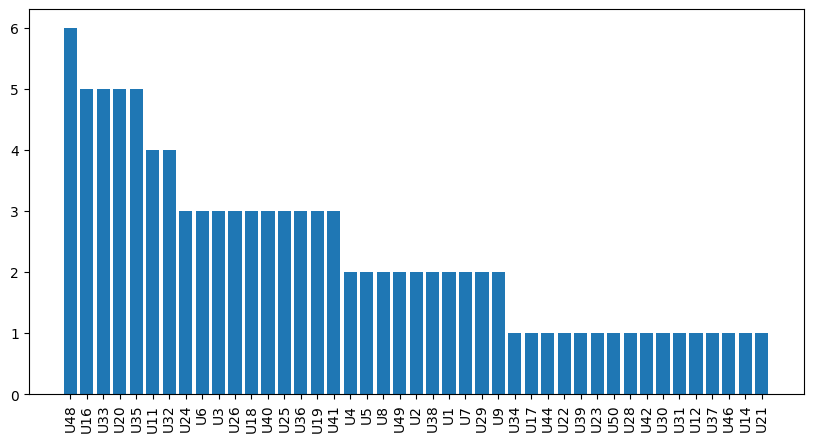

In [20]:
creators_counts = posts_df["creator_id"].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(creators_counts.index, creators_counts.values)
plt.xticks(rotation=90)
plt.show()

### B.3 Inspect Column 'content_type'

All looks normal

In [21]:
posts_df["content_type"].unique()

array(['video', 'text', 'image', 'audio'], dtype=object)

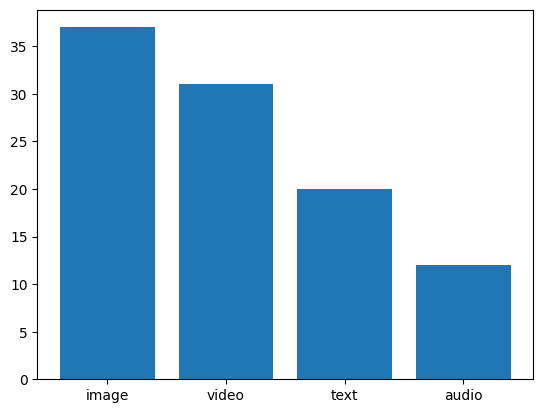

In [22]:
types_counts = posts_df["content_type"].value_counts()
plt.bar(types_counts.index, types_counts.values)
plt.show()

### B.4 Inspect Column 'tags'

There are no missing values

In [23]:
posts_df[posts_df["tags"].isna()]

,post_id,creator_id,content_type,tags


There are duplicate values, possibly due to the space after the ','

In [24]:
Counter(",".join(posts_df["tags"]).split(","))

Counter({'sports': 15,
         ' food': 8,
         'music': 10,
         ' travel': 4,
         ' gaming': 4,
         'food': 9,
         ' fashion': 4,
         ' fitness': 7,
         'travel': 10,
         'art': 8,
         'literature': 16,
         'fitness': 10,
         ' music': 7,
         'tech': 10,
         ' sports': 10,
         ' literature': 4,
         ' art': 4,
         'gaming': 9,
         ' tech': 3,
         'fashion': 3})

## C. Engagements Table

### C.1 General Information

In [25]:
engagements_df.head(5)

,user_id,post_id,engagement
0,U1,P52,1
1,U1,P44,0
2,U1,P1,1
3,U1,P4,1
4,U1,P65,0


In [26]:
engagements_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     1000 non-null   object
 1   post_id     1000 non-null   object
 2   engagement  1000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [27]:
engagements_df.describe()

,engagement
count,1000.000000
mean,0.497000
std,0.500241
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [28]:
engagements_df.describe(include = "object")

,user_id,post_id
count,1000,1000
unique,50,100
top,U1,P7
freq,20,17


### C.2 Inspect Column 'engagement'

All normal

In [29]:
engagements_df["engagement"].unique()

array([1, 0])

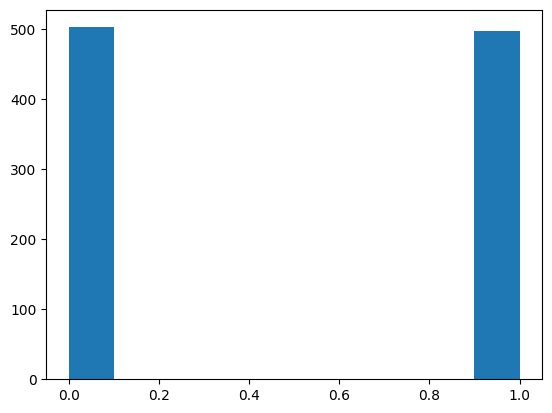

In [30]:
plt.hist(engagements_df["engagement"])
plt.show()

### C.3 Inspect Column 'user_id'

All users are listed

In [31]:
engagements_df["user_id"].unique().size

50

In [32]:
engagements_df["user_id"].unique()

array(['U1', 'U2', 'U3', 'U4', 'U5', 'U6', 'U7', 'U8', 'U9', 'U10', 'U11',
       'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U19', 'U20',
       'U21', 'U22', 'U23', 'U24', 'U25', 'U26', 'U27', 'U28', 'U29',
       'U30', 'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38',
       'U39', 'U40', 'U41', 'U42', 'U43', 'U44', 'U45', 'U46', 'U47',
       'U48', 'U49', 'U50'], dtype=object)

# 4. Data Cleaning

## A. Remove Spaces

In [33]:
users_df["top_3_interests"] = users_df["top_3_interests"].str.replace(" ", "")
users_df.head(5)

,user_id,age,gender,top_3_interests,past_engagement_score
0,U1,24,F,"sports,art,gaming",0.61
1,U2,32,F,"travel,food,fashion",0.93
2,U3,28,Other,"sports,travel,fashion",0.40
3,U4,25,M,"fashion,music,tech",0.53
4,U5,24,M,"fashion,food,fitness",0.80


In [34]:
posts_df["tags"] = posts_df["tags"].str.replace(" ", "")
posts_df.head(5)

,post_id,creator_id,content_type,tags
0,P1,U44,video,"sports,food"
1,P2,U26,video,"music,travel"
2,P3,U32,text,"sports,travel"
3,P4,U6,image,"music,gaming"
4,P5,U32,image,"food,fashion"


# 5. Process Data

## A. Mapping IDs

In [35]:
#Create dictionaries to map user_id and post_id to integer indices
user2idx = {u:i for i,u in enumerate(users_df["user_id"].unique())}
post2idx = {p:i for i,p in enumerate(posts_df["post_id"].unique())}

## B. Process 'Users' Table

In [36]:
interest_df = users_df["top_3_interests"]
interest_df.head(5)

,top_3_interests
0,"sports,art,gaming"
1,"travel,food,fashion"
2,"sports,travel,fashion"
3,"fashion,music,tech"
4,"fashion,food,fitness"


In [37]:
#Convert 'top_3_interests' column into binary columns
user_engagement_df = interest_df.str.get_dummies(sep = ",")
user_engagement_df.head(5)

,art,fashion,fitness,food,gaming,literature,music,sports,tech,travel
0,1,0,0,0,1,0,0,1,0,0
1,0,1,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,1,0,1
3,0,1,0,0,0,0,1,0,1,0
4,0,1,1,1,0,0,0,0,0,0


In [38]:
#Combine all features into 1 dataframe
user_interest_df = pd.concat([users_df["user_id"], user_engagement_df], axis = 1)
user_interest_df = pd.concat([user_interest_df, users_df["past_engagement_score"]], axis = 1)
user_interest_df = pd.concat([user_interest_df, users_df["gender"]], axis = 1)
user_interest_df.head(5)

,user_id,art,fashion,fitness,food,gaming,literature,music,sports,tech,travel,past_engagement_score,gender
0,U1,1,0,0,0,1,0,0,1,0,0,0.61,F
1,U2,0,1,0,1,0,0,0,0,0,1,0.93,F
2,U3,0,1,0,0,0,0,0,1,0,1,0.40,Other
3,U4,0,1,0,0,0,0,1,0,1,0,0.53,M
4,U5,0,1,1,1,0,0,0,0,0,0,0.80,M


## C. Proccess 'Posts' Table

In [39]:
tag_df = posts_df["tags"]
tag_df.head(5)

,tags
0,"sports,food"
1,"music,travel"
2,"sports,travel"
3,"music,gaming"
4,"food,fashion"


In [40]:
#Convert 'tags' column into binary columns
post_tag_df = tag_df.str.get_dummies(sep = ",")
post_tag_df.head(5)

,art,fashion,fitness,food,gaming,literature,music,sports,tech,travel
0,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,1,0,1,0,0,0
4,0,1,0,1,0,0,0,0,0,0


In [41]:
#Combine all features into 1 dataframe
post_tag_df = pd.concat([posts_df["post_id"], post_tag_df], axis = 1)
post_tag_df = pd.concat([post_tag_df, posts_df["content_type"]], axis = 1)
post_tag_df.head(5)

,post_id,art,fashion,fitness,food,gaming,literature,music,sports,tech,travel,content_type
0,P1,0,0,0,1,0,0,0,1,0,0,video
1,P2,0,0,0,0,0,0,1,0,0,1,video
2,P3,0,0,0,0,0,0,0,1,0,1,text
3,P4,0,0,0,0,1,0,1,0,0,0,image
4,P5,0,1,0,1,0,0,0,0,0,0,image


# 6. Data Normalization

## A. Engagements Table

In [42]:
#Copy the dataframe
normalized_engagements_df = engagements_df.copy()

In [43]:
#Assign indexes
normalized_engagements_df["user_idx"] = normalized_engagements_df["user_id"].map(user2idx)
normalized_engagements_df["post_idx"] = normalized_engagements_df["post_id"].map(post2idx)
normalized_engagements_df.head(5)

,user_id,post_id,engagement,user_idx,post_idx
0,U1,P52,1,0,51
1,U1,P44,0,0,43
2,U1,P1,1,0,0
3,U1,P4,1,0,3
4,U1,P65,0,0,64


In [44]:
#Obtain all necessary features
normalized_engagements_df = normalized_engagements_df[["user_idx", "post_idx", "engagement"]]
normalized_engagements_df.head(5)

,user_idx,post_idx,engagement
0,0,51,1
1,0,43,0
2,0,0,1
3,0,3,1
4,0,64,0


## B. Users Table

In [45]:
#Copy the dataframe
normalized_user_df = user_interest_df.copy()

In [46]:
#Generate an encoder
encoder_gender = LabelEncoder()

In [47]:
#Encode the 'gender' column
normalized_user_df["gender"] = encoder_gender.fit_transform(normalized_user_df["gender"])
normalized_user_df.head(5)

,user_id,art,fashion,fitness,food,gaming,literature,music,sports,tech,travel,past_engagement_score,gender
0,U1,1,0,0,0,1,0,0,1,0,0,0.61,0
1,U2,0,1,0,1,0,0,0,0,0,1,0.93,0
2,U3,0,1,0,0,0,0,0,1,0,1,0.40,2
3,U4,0,1,0,0,0,0,1,0,1,0,0.53,1
4,U5,0,1,1,1,0,0,0,0,0,0,0.80,1


In [48]:
#Scale in a range [0,1]
normalized_user_df["gender"] = normalized_user_df["gender"] / normalized_user_df["gender"].max()
normalized_user_df.head(5)

,user_id,art,fashion,fitness,food,gaming,literature,music,sports,tech,travel,past_engagement_score,gender
0,U1,1,0,0,0,1,0,0,1,0,0,0.61,0.0
1,U2,0,1,0,1,0,0,0,0,0,1,0.93,0.0
2,U3,0,1,0,0,0,0,0,1,0,1,0.40,1.0
3,U4,0,1,0,0,0,0,1,0,1,0,0.53,0.5
4,U5,0,1,1,1,0,0,0,0,0,0,0.80,0.5


In [49]:
#Drop 'user_id'
user_features = normalized_user_df.drop(columns=["user_id"]).values.astype(np.float32)
user_features[0]

array([1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.61,
       0.  ], dtype=float32)

## C. Posts Table

In [50]:
#Copy the dataframe
normalized_post_df = post_tag_df.copy()

In [51]:
#Generate an encoder
encoder_type = LabelEncoder()

In [52]:
#Encode the 'content_type' column
normalized_post_df["content_type"] = encoder_type.fit_transform(normalized_post_df["content_type"])
normalized_post_df.head(5)

,post_id,art,fashion,fitness,food,gaming,literature,music,sports,tech,travel,content_type
0,P1,0,0,0,1,0,0,0,1,0,0,3
1,P2,0,0,0,0,0,0,1,0,0,1,3
2,P3,0,0,0,0,0,0,0,1,0,1,2
3,P4,0,0,0,0,1,0,1,0,0,0,1
4,P5,0,1,0,1,0,0,0,0,0,0,1


In [53]:
#Scale in a range [0,1]
normalized_post_df["content_type"] = normalized_post_df["content_type"] / normalized_post_df["content_type"].max()
normalized_post_df.head(5)

,post_id,art,fashion,fitness,food,gaming,literature,music,sports,tech,travel,content_type
0,P1,0,0,0,1,0,0,0,1,0,0,1.000000
1,P2,0,0,0,0,0,0,1,0,0,1,1.000000
2,P3,0,0,0,0,0,0,0,1,0,1,0.666667
3,P4,0,0,0,0,1,0,1,0,0,0,0.333333
4,P5,0,1,0,1,0,0,0,0,0,0,0.333333


In [54]:
#Drop 'post_id'
post_features = normalized_post_df.drop(columns=["post_id"]).values.astype(np.float32)
post_features[0]

array([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.], dtype=float32)

# 7. Data Preparation

## A. Prepare Data X (input), Y (output)

In [55]:
#Extract user and post indices and engagement labels
X_users = normalized_engagements_df["user_idx"].values
X_posts = normalized_engagements_df["post_idx"].values
y = normalized_engagements_df["engagement"].values.astype(np.float32)

In [56]:
y[0:10]

array([1., 0., 1., 1., 0., 1., 0., 0., 1., 0.], dtype=float32)

In [57]:
#Align user and post features with interactions
X_user_feats = np.array([user_features[i] for i in X_users])
X_post_feats = np.array([post_features[j] for j in X_posts])

## B. Split into Test and Train Data

In [58]:
X_users_train, X_users_test, \
X_posts_train, X_posts_test, \
X_user_feats_train, X_user_feats_test, \
X_post_feats_train, X_post_feats_test, \
y_train, y_test = train_test_split(
    X_users, X_posts, X_user_feats, X_post_feats, y,
    test_size = 0.1, random_state = 26, stratify = y
)

## C. Prepare Input Data

In [59]:
n_users = len(user2idx)
n_posts = len(post2idx)
user_feat_dim = user_features.shape[1]
post_feat_dim = post_features.shape[1]
#Embeding size
emb_size = 16

In [60]:
#Prepare all inputs user
user_in = keras.Input(shape=(), dtype = "int32", name = "user_idx")
user_feat_in = keras.Input(shape=(user_feat_dim,), name = "user_feats")

user_emb = layers.Embedding(n_users, emb_size)(user_in)
user_emb = layers.Flatten()(user_emb)

In [61]:
#Prepare all inputs posts
post_in = keras.Input(shape=(), dtype = "int32", name = "post_idx")
post_feat_in = keras.Input(shape=(post_feat_dim,), name = "post_feats")

post_emb = layers.Embedding(n_posts, emb_size)(post_in)
post_emb = layers.Flatten()(post_emb)

# 8. Model Architecture

## A. MLP Architecture

In [73]:
#Define all layers and parameters
x = layers.Concatenate()([user_emb, post_emb, user_feat_in, post_feat_in])
x = layers.Dense(55, activation="relu")(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(34, activation="relu")(x)
x = layers.Dense(17, activation="relu")(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(9, activation="relu")(x)
out = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=[user_in, post_in, user_feat_in, post_feat_in], outputs = out)
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user_idx            │ (None)            │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ post_idx            │ (None)            │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 16)        │        800 │ user_idx[0][0]    │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 16)        │      1,600 │ post_idx[0][0]    │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 16)        │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 16)        │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_feats          │ (None, 12)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ post_feats          │ (None, 11)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 55)        │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0],  │
│                     │                   │            │ user_feats[0][0], │
│                     │                   │            │ post_feats[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 55)        │      3,080 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 55)        │          0 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 34)        │      1,904 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 17)        │        595 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 17)        │          0 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 9)         │        162 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 1)         │         10 │ dense_13[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 8,151 (31.84 KB)

 Trainable params: 8,151 (31.84 KB)

 Non-trainable params: 0 (0.00 B)

# 9. Model Training

In [74]:
history = model.fit([X_users_train, X_posts_train, X_user_feats_train, X_post_feats_train],
                    y_train, batch_size = 32, epochs = 30, verbose = 2, validation_split=0.1)

Epoch 1/30
26/26 - 3s - 131ms/step - accuracy: 0.5012 - loss: 0.6929 - val_accuracy: 0.5556 - val_loss: 0.6891
Epoch 2/30
26/26 - 0s - 7ms/step - accuracy: 0.5222 - loss: 0.6881 - val_accuracy: 0.5444 - val_loss: 0.6886
Epoch 3/30
26/26 - 0s - 7ms/step - accuracy: 0.5864 - loss: 0.6789 - val_accuracy: 0.4889 - val_loss: 0.6925
Epoch 4/30
26/26 - 0s - 7ms/step - accuracy: 0.6049 - loss: 0.6710 - val_accuracy: 0.5444 - val_loss: 0.6832
Epoch 5/30
26/26 - 0s - 7ms/step - accuracy: 0.6432 - loss: 0.6487 - val_accuracy: 0.4889 - val_loss: 0.6876
Epoch 6/30
26/26 - 0s - 8ms/step - accuracy: 0.6716 - loss: 0.6197 - val_accuracy: 0.5000 - val_loss: 0.7052
Epoch 7/30
26/26 - 0s - 7ms/step - accuracy: 0.6691 - loss: 0.6083 - val_accuracy: 0.5667 - val_loss: 0.7115
Epoch 8/30
26/26 - 0s - 8ms/step - accuracy: 0.6938 - loss: 0.5914 - val_accuracy: 0.4889 - val_loss: 0.7402
Epoch 9/30
26/26 - 0s - 8ms/step - accuracy: 0.7000 - loss: 0.5755 - val_accuracy: 0.4778 - val_loss: 0.7643
Epoch 10/30
26/26

# 10. Evaluate Model

## A. Train Accuracy and Loss

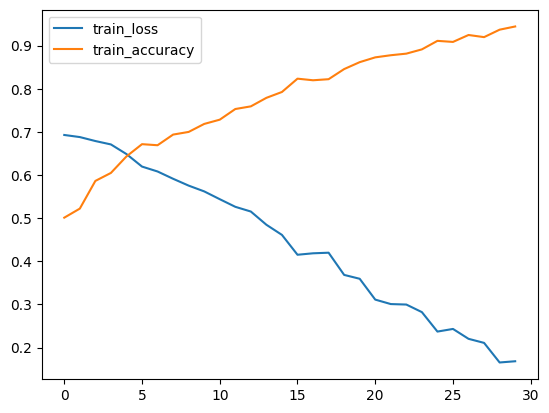

In [75]:
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["accuracy"], label="train_accuracy")
plt.legend()
plt.show()

## B. Accuracy Test

In [77]:
loss, accuracy = model.evaluate([X_users_test, X_posts_test, X_user_feats_test, X_post_feats_test], y_test)
print("Test accuracy:", accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5137 - loss: 1.4669
Test accuracy: 0.49000000953674316


## C. HitRate@k Metric

This metric is recommended

In [78]:
def recommend_topk(user_id, k = 3):
  '''
  user_id: User ID
  k: Number of recommendations
  '''
  #Get the user's numeric index
  u_idx = user2idx[user_id]
  u_feat = np.expand_dims(user_features[u_idx], axis = 0)
  all_posts = np.arange(n_posts)
  all_post_feats = post_features
  u_batch = np.repeat([u_idx], n_posts)
  u_feat_batch = np.repeat(u_feat, n_posts, axis=0)
  #Predict with the model for each post
  preds = model.predict([u_batch, all_posts, u_feat_batch, all_post_feats], verbose=0).ravel()
  #Get the indexes of the k posts with the highest score
  topk_idx = preds.argsort()[-k:][::-1]
  #Recover the original IDs
  inv_post = {v:k for k,v in post2idx.items()}

  return [inv_post[i] for i in topk_idx]

In [79]:
def hitrate_at_k(model, test_df, k = 3):
  '''
  model: Model
  test_df: Test dataframe
  k: Number of recommendations
  '''
  hits, total = 0, 0
  #Iterate for each user
  for uid in test_df["user_id"].unique():
    true_items = test_df[(test_df["user_id"]==uid) & (test_df["engagement"]==1)]["post_id"].tolist()
    if not true_items:
      continue
    recs = recommend_topk(uid, k)
    #Check if at least one of the actual posts is in the recommendations
    if any(item in recs for item in true_items):
      hits += 1
    total += 1
  return hits/total*100 if total > 0 else 0

print("HitRate@3: {}%".format(hitrate_at_k(model, engagements_df, 3)))

HitRate@3: 66.0%


# 11. Save Model

In [80]:
model.save("recomendation_model_v1.keras")

# 12. Generate Recommendations

In [81]:
print(recommend_topk("U1", 3))

['P29', 'P23', 'P63']
